# Lab. 3, Jakub Margol

## Interpolacja wielomianem Lagrange'a

In [4]:
using Pkg
Pkg.add("Plots")
Pkg.add("CSV")
Pkg.add("DataFrames")
using Plots
using CSV, DataFrames
using Statistics

   Updating registry at `/srv/julia/pkg/registries/General`
  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`
  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`
  Resolving package versions...
No Changes to `~/Project.toml`
No Changes to `~/Manifest.toml`


Zdefiniujemy funkcje:

In [54]:
function Lk(x, k, xs)
    d = 1
    m = 1
    for i in 1:length(xs)
        if i != k
            d = d * (x - xs[i])
            m = m * (xs[k] - xs[i])
        end
    end
    return d/m
end

function Pn(x, xs, ys)
    sum = 0
    for i in 1:length(xs)
        sum = sum + ys[i] * Lk(x, i, xs)
    end
    return sum
end

function Pnfunction(xs, ys)
    res(x) = Pn(x, xs, ys)
    return res
end

Pnfunction (generic function with 1 method)

Przetestujemy dla losowych wartości 5 węzłów:

In [55]:
xs = [1,2,3,4,5]
ys = [4,53,-32,4,11]

5-element Array{Int64,1}:
   4
  53
 -32
   4
  11

In [56]:
interFunc = Pnfunction(xs, ys)

(::var"#res#3"{Array{Int64,1},Array{Int64,1}}) (generic function with 1 method)

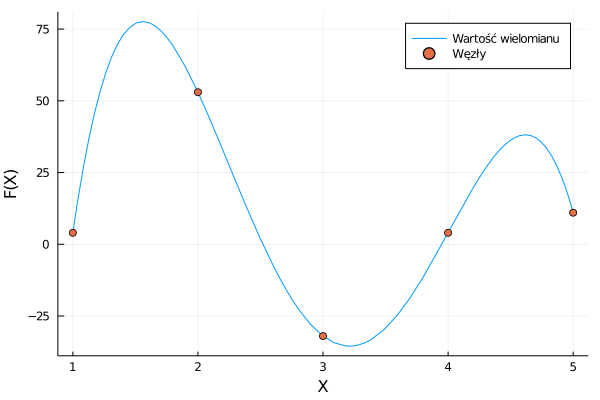

In [57]:
plot(interFunc,1,5, label = "Wartość wielomianu")
scatter!(xs, ys, label = "Węzły")
xlabel!("X")
ylabel!("F(X)")

Sprawdzimy również jak prezentuje się wykres w porównaniu z faktyczną funkcją generującą dane węzły:

In [58]:
func(x) = (x*x - 5x + x*x*x)

xs = [1,3,6,8,9]
for i in 1:length(xs)
    ys[i] = func(xs[i])
end

interFunc = Pnfunction(xs, ys)

(::var"#res#3"{Array{Int64,1},Array{Int64,1}}) (generic function with 1 method)

Wykres dla funkcji:

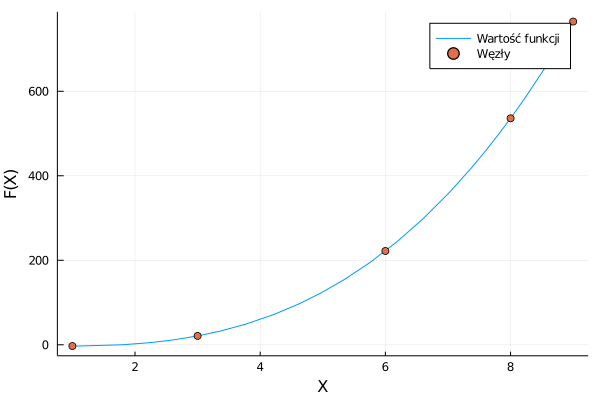

In [59]:
plot(func,1,9, label = "Wartość funkcji")
scatter!(xs, ys, label = "Węzły")
xlabel!("X")
ylabel!("F(X)")

Wykres dla funkcji interpolacyjnej:

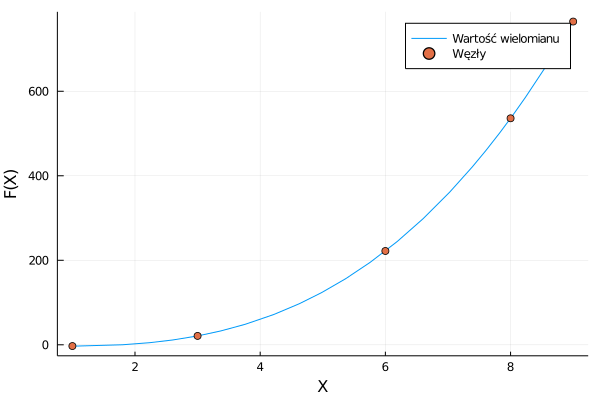

In [60]:
plot(interFunc,1,9, label = "Wartość wielomianu")
scatter!(xs, ys, label = "Węzły")
xlabel!("X")
ylabel!("F(X)")

Inna przykładowa funkcja:

In [61]:
func(x) = (7x - 5 + x - x*x)

xs = [1,3,6,8,9]
for i in 1:length(xs)
    ys[i] = func(xs[i])
end

interFunc = Pnfunction(xs, ys)

(::var"#res#3"{Array{Int64,1},Array{Int64,1}}) (generic function with 1 method)

Wykres dla funkcji:

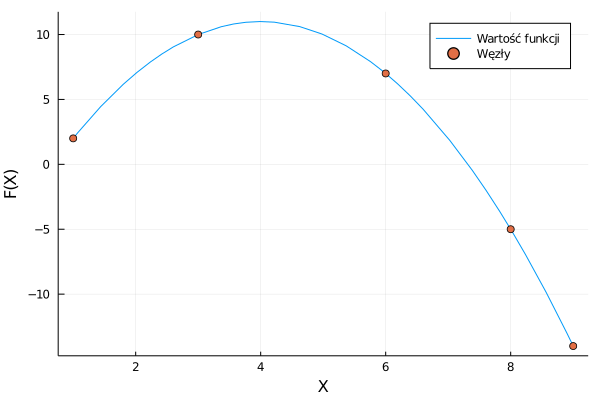

In [62]:
plot(func,1,9, label = "Wartość funkcji")
scatter!(xs, ys, label = "Węzły")
xlabel!("X")
ylabel!("F(X)")

Wykres dla funkcji interpolacyjnej:

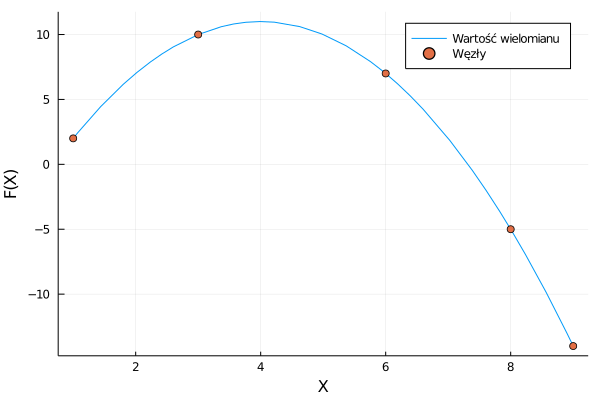

In [63]:
plot(interFunc,1,9, label = "Wartość wielomianu")
scatter!(xs, ys, label = "Węzły")
xlabel!("X")
ylabel!("F(X)")

## Metoda Newtona

Tworzymy funkcje:

Newtoninterpolation - wylicza i zwraca ilorazy różnicowe dla podanych węzłów

Horner - wylicza wartość dla obiektu newt w punkcie x za pomocą schematu Hornera

Newton - przyjmuje zarówno węzły i x, następnie stosuje obie poprzednie funkcje

NewtonFinalFunction - przyjmuje same węzły i zwraca funkcję gotową przyjąć sam x

In [64]:
function Newtoninterpolation(xs,ys)
    n = length(xs)
    newt = deepcopy(ys)
    for i in 2:n
        for j in 1:i-1
            newt[i] = (newt[j] - newt[i])/(xs[j] - xs[i])
        end
    end
    return newt
end

function Horner(xs, newt, x)
    n = length(xs)
    result = newt[n]
    for i in n-1:-1:1
        result = result*(x - xs[i]) + newt[i]
    end
    return result
end

function Newton(xs,ys,x)
    newt = Newtoninterpolation(xs,ys)
    result = Horner(xs,newt,x)
    return result
end

function NewtonFinalFunction(xs, ys)
    res(x) = Newton(xs, ys, x)
    return res
end

NewtonFinalFunction (generic function with 1 method)

Sprawdzimy wykres dla węzłów takich jak przy metodzie Lagrange'a

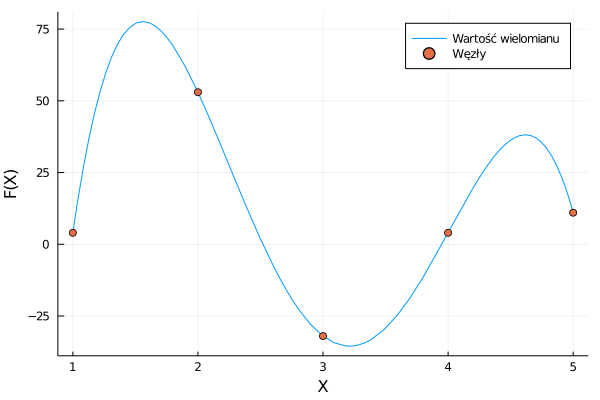

In [65]:
xs = [1,2,3,4,5]
ys = [4.0,53.0,-32.0,4.0,11.0]

interFunc = NewtonFinalFunction(xs, ys)

plot(interFunc,1,5, label = "Wartość wielomianu")
scatter!(xs, ys, label = "Węzły")
xlabel!("X")
ylabel!("F(X)")

Z jakiegoś powodu, którego nie potrafię zrozumieć nie jestem w stanie zaimportować pakietu Polynomials, nie dam rady wykonać tej interpolacji.

Zaprezentuję na wykresie wynik metody Lagrange'a i Newtona

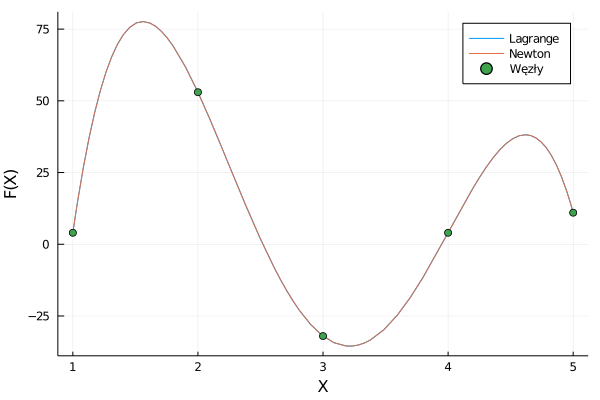

In [66]:
xs = [1,2,3,4,5]
ys = [4.0,53.0,-32.0,4.0,11.0]

lagFunc = Pnfunction(xs, ys)
newFunc = NewtonFinalFunction(xs, ys)

plot([lagFunc,newFunc],1,5, label = ["Lagrange" "Newton"])
scatter!(xs, ys, label = "Węzły")
xlabel!("X")
ylabel!("F(X)")

Wykresy dla obu metod pokrywają się, przynajmniej dla zadanych węzłów.

Zmierzymy czasy wykonania dla różnych ilości węzłów: dla Lagrange'a całej funkcji i porównamy z czasem wykonania funkcji z metodą Newtona, a następnie dla Newtona osobno czas wyliczania wielomianu i osobno wartości w punkcie. Wykonamy po 10 pomiarów na ilośc węzłów. Wyniki zapiszemy do odpowiedniego DataFrame'a.

In [78]:
df = DataFrame(A = String[], B = Int[], C = Float64[])
colnames = ["Funkcja","Ilość węzłów","Czas wykonania"]

rename!(df, Symbol.(colnames))

,Funkcja,Ilość węzłów,Czas wykonania
,String,Int64,Float64


Dla 5 węzłów z przedziału 1-30 i ich wartości 1-100:

In [79]:
for i in 1:10
    #wylosowanie węzłów
    xs = []
    push!(xs, 1)
    for n in 2:4
       push!(xs, rand(2:29)) 
    end
    push!(xs, 30)
    sort(xs)

    ys = []
    for n in 1:5
       push!(ys, round(rand(Float64)*100)) 
    end
    
    lagFunc = Pnfunction(xs, ys)
    newFunc = NewtonFinalFunction(xs, ys)
    
    #pomiary czasu
    push!(df,("Lagrange", 5, (@timed lagFunc(i)).time))
    push!(df,("Newton wielomian", 5, (@timed Newtoninterpolation(xs,ys)).time))
    newt = Newtoninterpolation(xs,ys)
    push!(df,("Newton w punkcie", 5, (@timed Horner(xs,newt,i)).time))
    push!(df,("Newton cały", 5, (@timed newFunc(i)).time))
end

df

,Funkcja,Ilość węzłów,Czas wykonania
,String,Int64,Float64
1,Lagrange,5,2.3536e-5
2,Newton wielomian,5,1.2063e-5
3,Newton w punkcie,5,4.519e-6
4,Newton cały,5,4.139e-6
5,Lagrange,5,4.97e-6
6,Newton wielomian,5,1.302e-6
7,Newton w punkcie,5,5.64e-7
8,Newton cały,5,2.284e-6
9,Lagrange,5,3.609e-6


Dla 50 węzłów z przedziału 1-100 i ich wartości 1-100:

In [80]:
for i in 1:10
    #wylosowanie węzłów
    xs = []
    push!(xs, 1)
    for n in 2:49
       push!(xs, rand(2:99)) 
    end
    push!(xs, 100)
    sort(xs)

    ys = []
    for n in 1:50
       push!(ys, round(rand(Float64)*100)) 
    end
    
    lagFunc = Pnfunction(xs, ys)
    newFunc = NewtonFinalFunction(xs, ys)
    
    #pomiary czasu
    push!(df,("Lagrange", 50, (@timed lagFunc(i)).time))
    push!(df,("Newton wielomian", 50, (@timed Newtoninterpolation(xs,ys)).time))
    newt = Newtoninterpolation(xs,ys)
    push!(df,("Newton w punkcie", 50, (@timed Horner(xs,newt,i)).time))
    push!(df,("Newton cały", 50, (@timed newFunc(i)).time))
end

df

,Funkcja,Ilość węzłów,Czas wykonania
,String,Int64,Float64
1,Lagrange,5,2.3536e-5
2,Newton wielomian,5,1.2063e-5
3,Newton w punkcie,5,4.519e-6
4,Newton cały,5,4.139e-6
5,Lagrange,5,4.97e-6
6,Newton wielomian,5,1.302e-6
7,Newton w punkcie,5,5.64e-7
8,Newton cały,5,2.284e-6
9,Lagrange,5,3.609e-6


Dla 100 węzłów z przedziału 1-200 i ich wartości 1-100:

In [81]:
for i in 1:10
    #wylosowanie węzłów
    xs = []
    push!(xs, 1)
    for n in 2:99
       push!(xs, rand(2:199)) 
    end
    push!(xs, 200)
    sort(xs)

    ys = []
    for n in 1:100
       push!(ys, round(rand(Float64)*100)) 
    end
    
    lagFunc = Pnfunction(xs, ys)
    newFunc = NewtonFinalFunction(xs, ys)
    
    #pomiary czasu
    push!(df,("Lagrange", 100, (@timed lagFunc(i)).time))
    push!(df,("Newton wielomian", 100, (@timed Newtoninterpolation(xs,ys)).time))
    newt = Newtoninterpolation(xs,ys)
    push!(df,("Newton w punkcie", 100, (@timed Horner(xs,newt,i)).time))
    push!(df,("Newton cały", 100, (@timed newFunc(i)).time))
end

df

,Funkcja,Ilość węzłów,Czas wykonania
,String,Int64,Float64
1,Lagrange,5,2.3536e-5
2,Newton wielomian,5,1.2063e-5
3,Newton w punkcie,5,4.519e-6
4,Newton cały,5,4.139e-6
5,Lagrange,5,4.97e-6
6,Newton wielomian,5,1.302e-6
7,Newton w punkcie,5,5.64e-7
8,Newton cały,5,2.284e-6
9,Lagrange,5,3.609e-6


In [82]:
grouped = groupby(df, :1 :2)

,Funkcja,Ilość węzłów,Czas wykonania
,String,Int64,Float64
1,Lagrange,5,2.3536e-5
2,Lagrange,5,4.97e-6
3,Lagrange,5,3.609e-6
4,Lagrange,5,4.546e-6
5,Lagrange,5,3.313e-6
6,Lagrange,5,3.735e-6
7,Lagrange,5,3.144e-6
8,Lagrange,5,2.849e-6
9,Lagrange,5,3.008e-6


In [83]:
tm = combine(grouped, "Czas wykonania" => mean)
tmp = combine(grouped, "Czas wykonania" => std)
tmp."Czas wykonania_std"
tm."Odchylenie st." = tmp."Czas wykonania_std"
rename!(tm, "Czas wykonania_mean" => "Średni czas wykonania")

,Funkcja,Ilość węzłów,Średni czas wykonania,Odchylenie st.
,String,Int64,Float64,Float64
1,Lagrange,5,5.5501e-6,6.36016e-6
2,Newton wielomian,5,2.2823e-6,3.43868e-6
3,Newton w punkcie,5,8.589e-7,1.28725e-6
4,Newton cały,5,1.9126e-6,8.35204e-7
5,Lagrange,50,0.000412185,1.78273e-5
6,Newton wielomian,50,0.000150941,1.29988e-5
7,Newton w punkcie,50,8.7509e-6,3.26147e-6
8,Newton cały,50,0.000157669,1.29732e-5
9,Lagrange,100,0.00138627,0.000442087


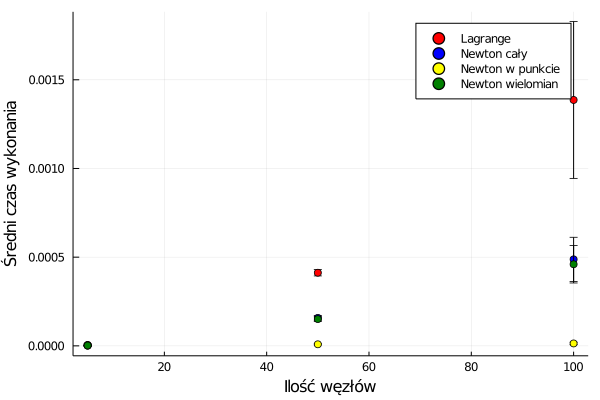

In [84]:
scatter(tm."Ilość węzłów", tm."Średni czas wykonania", group=tm.Funkcja, colour = [:red :blue :yellow :green], 
        yerr=tm."Odchylenie st.")
xlabel!("Ilość węzłów")
ylabel!("Średni czas wykonania")

Im większa ilość węzłów tym bardziej uwidatnia się rónica w czasie wykonania:

Najbardziej czasochłonna jest metoda Lagrange'a, a w metodzie Newtona najwięcej czasu zajmuje wyznaczanie ilorazów róznicowych, gdyż czas wykonania całej funkcji od czasu wyznaczenia ilorazów róznicowych różni się relatywnie niewiele. Metoda Lagrange'a zdaje się również produkować największe błedy.

## Algorytm Neville'a

In [85]:
function neville(x, xs, ys)
    n = length(xs)
    p = zeros(n)
    for k in 1:n
        for i in 1:(n-k)
            if k == 1
                p[i] = ys[i]
            end
            if k != 1
                p[i] = ((x-xs[i+k])*p[i]+(xs[i]-x)*p[i+1])/(xs[i]-xs[i+k])
            end
        end
    end
    return p[1]
end

neville (generic function with 1 method)

Porównanie z metodą Lagrange'a

In [86]:
xs = [1,2,3,4,5]
ys = [4.0,53.0,-32.0,4.0,11.0]

print("Neville 2: ",  neville(2, xs, ys), "\n")
print("Lagrange 2: ", Pn(2, xs, ys), "\n")

print("Neville 3.3: ",  neville(3.3, xs, ys), "\n")
print("Lagrange 3.3: ", Pn(3.3, xs, ys), "\n")

print("Neville 4.5: ",  neville(4.5, xs, ys), "\n")
print("Lagrange 4.5: ", Pn(4.5, xs, ys), "\n")

Neville 2: 40.75
Lagrange 2: 53.0
Neville 3.3: -2.109374999999993
Lagrange 3.3: -34.911687500000006
Neville 4.5: -21.046875
Lagrange 4.5: 36.3203125


In [87]:
xs = [1,2,3,4,5,6,7,8,9,10]
ys = [12.0, 43.0, 12.0, -11.0, 7.0, 0.0, 42.0, -54.0, 9.0, 10.0]

print("Neville 2: ",  neville(2, xs, ys), "\n")
print("Lagrange 2: ", Pn(2, xs, ys), "\n")

print("Neville 3.3: ",  neville(3.3, xs, ys), "\n")
print("Lagrange 3.3: ", Pn(3.3, xs, ys), "\n")

print("Neville 4.5: ",  neville(4.5, xs, ys), "\n")
print("Lagrange 4.5: ", Pn(4.5, xs, ys), "\n")

Neville 2: 39.55555555555556
Lagrange 2: 43.0
Neville 3.3: 9.334197198904521
Lagrange 3.3: -10.924467923381242
Neville 4.5: -3.791595458984375
Lagrange 4.5: 5.17608642578125
